# Lead Score Case Study
### By Amarpreet & Mathan

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading dataset
df_lead=pd.read_csv('Leads.csv',encoding='utf-8')

### Reading the data

In [4]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the dataset

##### Checking for rows and coulmns

In [5]:
df_lead.shape

(9240, 37)

##### Checking dimensions

In [6]:
df_lead.ndim

2

##### Checking the column-wise info of the dataframe

In [7]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Checking the summary for the numeric columns

In [8]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Initial thoughts

lead Score dataset has 9240 rows and 37 columns.

Most of the columns are categorical in nature, ie 30 categorical coulmns and 7 numeric columns.

### Data quality checks 

##### Looking at Null Values

In [9]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#percentage of missing values in all columns
round((df_lead.isnull().mean()*100).sort_values(ascending = False),2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

##### Droping coulmns having null percentage greater than 30%

In [11]:
df_lead = df_lead.loc[:,df_lead.isnull().mean()<=0.30]

###### Checking if there are columns with one unique value since it won't affect our analysis ie redundant coulmns

In [12]:
df_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
# Drop all the columns which have unque value as 1

for col in df_lead.columns:
    if df_lead[col].nunique() == 1:
        df_lead.drop(col, 1, inplace=True)

In [14]:
df_lead.shape   #reinspecting the dataset

(9240, 26)

In [15]:
#percentage of missing values in all columns
round((df_lead.isnull().mean()*100).sort_values(ascending = False),2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Call                                       0.00
Last Notable Activity                             0.00
A free cop

### Looking at null columns individually 

In [16]:
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Droping 'What matters most to you in choosing a course' since it is highly skewed

In [17]:
drop_col=['What matters most to you in choosing a course'] #creating a list of coulmns to be droped

In [18]:
df_lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Using mode to impute missing value

In [19]:
# 'Lead Profile' is a object variable (categorical column), thus using mode to impute values
df_lead['Lead Profile'].fillna((df_lead['Lead Profile'].mode()[0]),inplace = True)

In [20]:
# rechecking
df_lead['Lead Profile'].value_counts()

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [21]:
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Using mode to impute missing value

In [22]:
# 'What is your current occupation' is a object variable (categorical column), thus using mode to impute values
df_lead['What is your current occupation'].fillna((df_lead['What is your current occupation'].mode()[0]),inplace = True)

In [23]:
# rechecking
df_lead['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Ghana                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
China                      2
Philippines                2
Belgium                    2
Italy                      2
Asia/Pacific Region        2
Kenya                      1
Switzerland                1
Indonesia                  1
Sri Lanka                  1
Russia                     1
Liberia                    1
Vietnam       

Droping 'Country' since it is highly skewed

In [25]:
drop_col.append('Country')

In [26]:
df_lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [27]:
# 'How did you hear about X Education' is a object variable (categorical column), thus using mode to impute values
df_lead['How did you hear about X Education'].fillna((df_lead['How did you hear about X Education'].mode()[0]),inplace = True)

In [28]:
# rechecking
df_lead['How did you hear about X Education'].value_counts()

Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
df_lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
# 'Specialization' is a object variable (categorical column), thus using mode to impute values
df_lead['Specialization'].fillna((df_lead['Specialization'].mode()[0]),inplace = True)

In [31]:
# rechecking
df_lead['Specialization'].value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
df_lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Droping cities as the it is irrelevant to problem statement

In [33]:
drop_col.append('City')

In [34]:
df_lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

Text(0.5, 1.0, 'Distribution of TotalVisits')

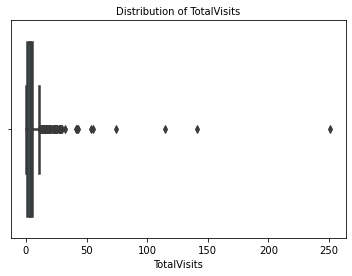

In [35]:
sns.boxplot(df_lead['TotalVisits'],linewidth=2.5,palette='crest');
plt.title("Distribution of TotalVisits",fontsize = 10)

From above boxplots its clear there are outliers thus imputing with median

In [36]:
# imputing using median
df_lead['TotalVisits'].fillna(df_lead['TotalVisits'].median(),inplace = True)

In [37]:
df_lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Text(0.5, 1.0, 'Page Views Per Visit')

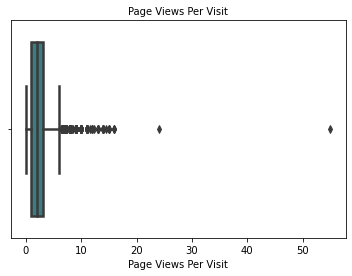

In [38]:
sns.boxplot(df_lead['Page Views Per Visit'],linewidth=2.5,palette='crest');
plt.title("Page Views Per Visit",fontsize = 10)

From above boxplots its clear there are outliers thus imputing with median

In [39]:
# imputing using median
df_lead['Page Views Per Visit'].fillna(df_lead['Page Views Per Visit'].median(),inplace = True)

In [40]:
df_lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [41]:
# 'Last Activity' is a object variable (categorical column), thus using mode to impute values
df_lead['Last Activity'].fillna((df_lead['Last Activity'].mode()[0]),inplace = True)

In [42]:
df_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [43]:
df_lead['Lead Source']=df_lead['Lead Source'].apply(lambda x:x.capitalize())

df_lead['Lead Source'].value_counts()

We found one column 'Lead Source' is having same label name 'Google' but in different format('google') so we make them in a same format.

In [44]:
# 'Lead Source' is a object variable (categorical column), thus using mode to impute values
df_lead['Lead Source'].fillna((df_lead['Lead Source'].mode()[0]),inplace = True)

##### Droping Unwanted Columns

In [45]:
drop_col.append('Prospect ID')
drop_col.append('Lead Number')

In [154]:
drop_col

['What matters most to you in choosing a course',
 'Country',
 'City',
 'Prospect ID',
 'Lead Number']

In [46]:
df_lead = df_lead.drop(labels= drop_col,axis=1)

#### Relooking at null values

In [47]:
round((df_lead.isnull().mean()*100).sort_values(ascending = False),2)

Last Notable Activity                     0.0
Specialization                            0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
How did you hear about X Education        0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Lead Profile                              0.0
Lead Origin                               0.0
dtype: float64

###### Relooking at the shape

In [48]:
df_lead.shape

(9240, 21)

### Outliers Treatment
We know Logistic Regression is affected by outliners

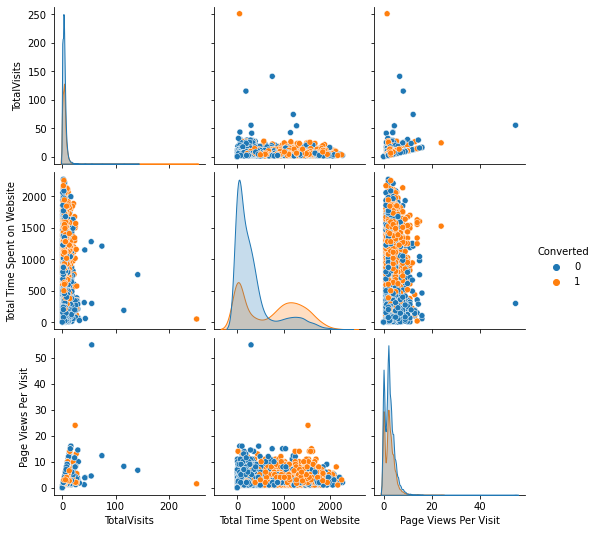

In [49]:
sns.pairplot(df_lead,diag_kind='kde',hue='Converted')
plt.show()

We can observe there are significant outliers from the above pair plot

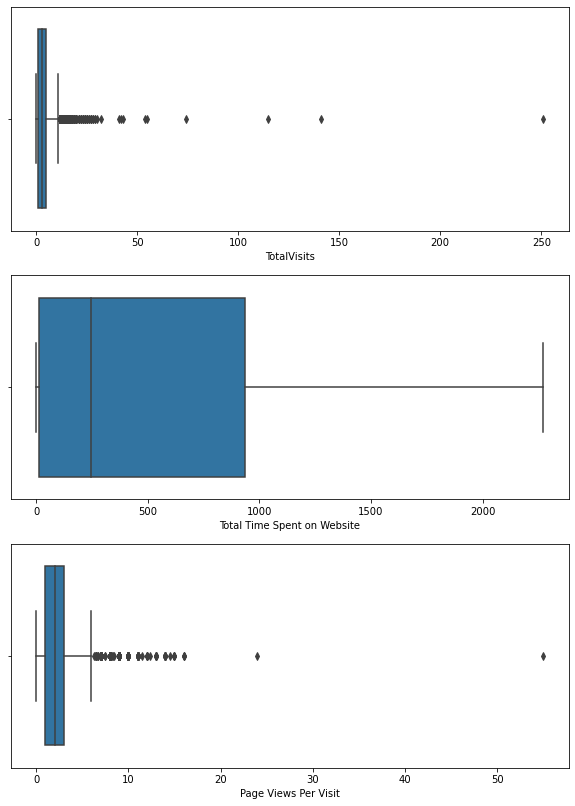

In [50]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(df_lead['Total Time Spent on Website'])
                    
plt.subplot(3,1,3)
sns.boxplot(df_lead['Page Views Per Visit'])                    
plt.show()

In [51]:
num_cols = df_lead[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
max,251.000000,2272.000000,55.000000


In [52]:
# capping at 95 percentile to mitigate the effect of outliers
df_lead['TotalVisits'].loc[df_lead['TotalVisits'] >= df_lead['TotalVisits'].quantile(0.95)] = df_lead['TotalVisits'].quantile(0.95)
#df_lead['Total Time Spent on Website'].loc[df_lead['Total Time Spent on Website'] >= df_lead['Total Time Spent on Website'].quantile(0.98)] = df_lead['Total Time Spent on Website'].quantile(0.98)
df_lead['Page Views Per Visit'].loc[df_lead['Page Views Per Visit'] >= df_lead['Page Views Per Visit'].quantile(0.95)] = df_lead['Page Views Per Visit'].quantile(0.95)


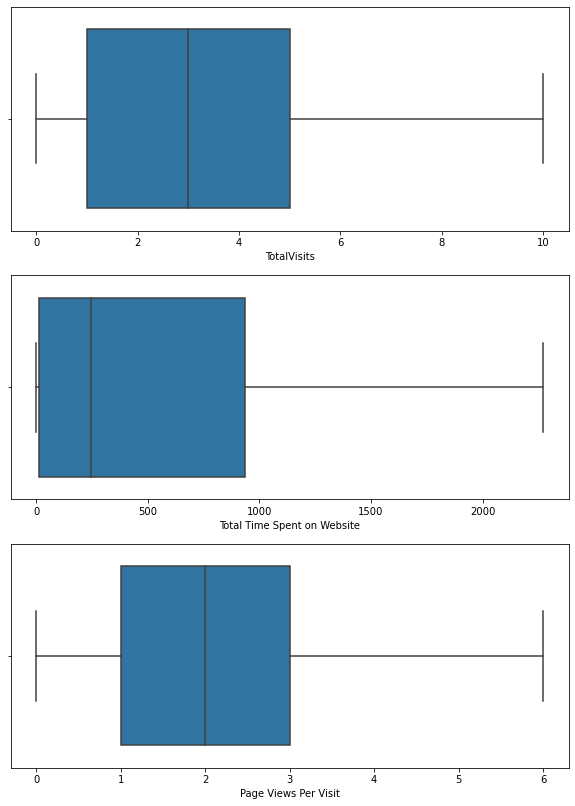

In [53]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_lead['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(df_lead['Total Time Spent on Website'])
                    
plt.subplot(3,1,3)
sns.boxplot(df_lead['Page Views Per Visit'])                    
plt.show()

##### We can see, we were able to significantly reduce the number of outliers by capping

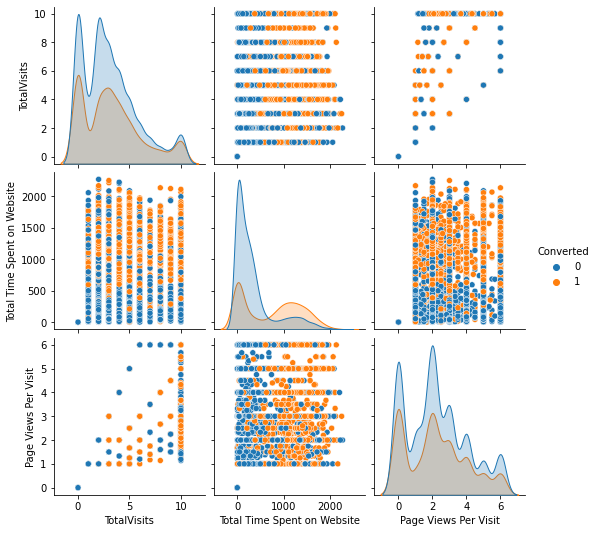

In [54]:
sns.pairplot(df_lead,diag_kind='kde',hue='Converted')
plt.show()

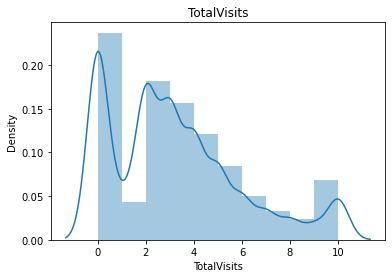

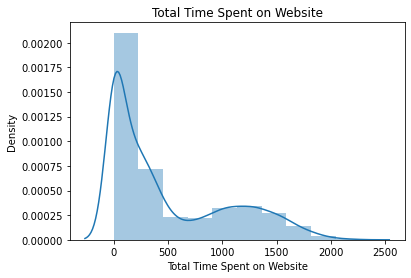

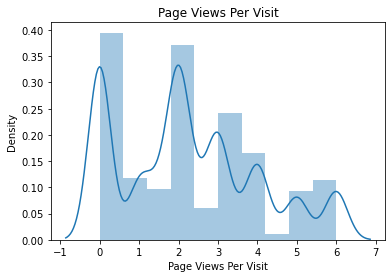

In [55]:
# looking at the distribution of numeric variables
for x in num_cols:
    sns.distplot(df_lead[x],bins=10)
    plt.title(x)
    plt.show()

##### Insights
Numeric data do have a certain degree of skewness towards right, need to perform scaling

In [56]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  How did you hear about X Education      9240 non-null   obje

##### Renaming Select as Others

In [57]:
# Columns which have "Select" as value

select_list = []
for col in df_lead:
    if(col=="Prospect ID"):
        pass
    else:
        if("Select" in df_lead[col].unique()):
            select_list.append(col) 
            
print(select_list)

['Specialization', 'How did you hear about X Education', 'Lead Profile']


In [58]:
df_lead[['Specialization']].value_counts()

Specialization                   
Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
dtype: int64

In [59]:
df_lead['Specialization']=df_lead['Specialization'].replace({'Select':'Others'})

In [60]:
df_lead[['Specialization']].value_counts()

Specialization                   
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
dtype: int64

In [61]:
df_lead[['How did you hear about X Education']].value_counts()

How did you hear about X Education
Select                                7250
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
dtype: int64

In [62]:
df_lead['How did you hear about X Education']=df_lead['How did you hear about X Education'].replace({'Select':'Others'})

In [63]:
df_lead[['How did you hear about X Education']].value_counts()

How did you hear about X Education
Others                                7250
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
dtype: int64

In [64]:
df_lead[['Lead Profile']].value_counts()

Lead Profile               
Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64

In [65]:
df_lead['Lead Profile']=df_lead['Lead Profile'].replace({'Select':'Others'})

In [66]:
df_lead[['Lead Profile']].value_counts()

Lead Profile               
Others                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64

#### Bi-Variate Analysis

In [67]:
df_lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

ValueError: Could not interpret input 'Lead Origin'

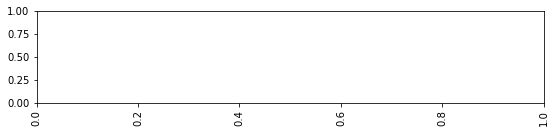

In [153]:
# Countplot for these categorical variables - application_clean

cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
        'TotalVisits','Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Number of numerical columns
ln=len(cols)

# calculation for subplots
n=2
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(2,figsize=(20,20))

# Running in loop to plot all columns as subplot
for column in cols:
    plt.subplot(m,n,ct)

    plt.xticks(rotation=90)
    sns.barplot(x=column,y="Converted",data=df_lead)
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

###### Observation 
Lead Quality ('Might be' and 'High in Relevance') are good inficators to determine if lead will convert.<br>
Lead Origin is good indicator if lead will convert.<br>
Lead Source are good indicators to determine if lead will convert.

##### Rechecking the Shape 

In [69]:
df_lead.shape

(9240, 21)

### Model Building

###### Creating Dummy Variable

In [70]:
df_categorical = df_lead.select_dtypes(exclude=['float64','datetime64','int64'])

In [71]:
dummies = pd.get_dummies(df_categorical, drop_first=True)
dummies

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
df_lead = df_lead.drop(list(df_categorical.columns), axis=1)

In [73]:
df_lead = pd.concat([df_lead, dummies], axis=1)

In [74]:
df_lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# singling out main variable Converted
ys = ['Converted']
X = df_lead.drop(labels= ys,axis=1)


In [76]:
# checking x info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 104 entries, TotalVisits to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(1), uint8(101)
memory usage: 1.1 MB


In [77]:
y = df_lead['Converted']

In [78]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# importing required lib to split data randomly for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
X_train.shape # checking shape

(6930, 104)

In [81]:
num_feat = list(X_train.describe().columns)
num_feat

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Do Not Email_Yes',
 'Do Not Call_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last

In [82]:
# Scaling to convert data into normal distribution since Windspeed and humidity had certain degree of skewness to right and left
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [83]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6583,-0.072351,-0.262707,0.410231,0.933789,-0.285709,-0.076194,-0.012013,-0.624413,-0.076194,1.491561,...,-0.012013,-0.031798,-0.766095,-0.138808,-0.194657,-0.012013,1.809006,-0.062541,-0.071247,-0.012013
5948,-0.434367,-0.780073,-0.713156,0.933789,-0.285709,-0.076194,-0.012013,-0.624413,-0.076194,-0.670438,...,-0.012013,-0.031798,1.305321,-0.138808,-0.194657,-0.012013,-0.552790,-0.062541,-0.071247,-0.012013
1119,-1.158400,-0.893019,-1.274850,-1.070906,-0.285709,-0.076194,-0.012013,-0.624413,-0.076194,-0.670438,...,-0.012013,-0.031798,1.305321,-0.138808,-0.194657,-0.012013,-0.552790,-0.062541,-0.071247,-0.012013
5387,0.289665,1.231098,0.971925,0.933789,-0.285709,-0.076194,-0.012013,-0.624413,-0.076194,1.491561,...,-0.012013,-0.031798,-0.766095,-0.138808,-0.194657,-0.012013,1.809006,-0.062541,-0.071247,-0.012013
4424,-1.158400,-0.893019,-1.274850,-1.070906,-0.285709,-0.076194,-0.012013,-0.624413,-0.076194,-0.670438,...,-0.012013,-0.031798,-0.766095,-0.138808,-0.194657,-0.012013,1.809006,-0.062541,-0.071247,-0.012013


### Model Building


In [84]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score

In [85]:
#builing a model with all the variables
X_train_sm_all = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm_all, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6830
Model Family:                Binomial   Df Model:                           99
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Sep 2021   Deviance:                          nan
Time:                        13:39:46   Pearson chi2:                 6.63e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     -1.54e+14   8.06e+05  -1.91e+08      0.000   -1.54e+14   -1.54e+14
TotalVisits                                              -1.517e+13    1.4e+06  -1.08e+07      0.000   -1.52e+13   -1.52e+13
Total Time Spent on Website                               6.105e+13   9.28e+05   6.58e+07      0.000    6.11e+13    6.11e+13
Page Views Per Visit                                      8.177e+13    1.5e+06   5.44e+07      0.000    8.18e+13    8.18e+13
Lead Origin_Landing Page Submission                      -1.547e+14    1.9e+06  -8.16e+07      0.000   -1.55e+14   -1.55e+14
Lead Origin_Lead Add Form                                 3.991e+14   3.71e+06   1.08e+08      0.000    3.99e+14    3.99e+14
Lead Origin_Lead Import                                    1.72e+13   3.63e+06   4.73e+06      0.000    1.72e+13    1.72e+13
Lead Origin_Quick Add Form                                7.338e+13   8.24e+05    8.9e+07      0.000    7.34e+13    7.34e+13
Lead Source_Direct Traffic                               -1.685e+15   2.23e+07  -7.54e+07      0.000   -1.69e+15   -1.69e+15
Lead Source_Facebook                                     -3.175e+14   5.23e+06  -6.07e+07      0.000   -3.17e+14   -3.17e+14
Lead Source_Google                                       -1.742e+15   2.29e+07  -7.59e+07      0.000   -1.74e+15   -1.74e+15
Lead Source_Live Chat                                    -1.016e+13   9.89e+05  -1.03e+07      0.000   -1.02e+13   -1.02e+13
Lead Source_NC_EDM                                        7.661e+12   1.01e+06    7.6e+06      0.000    7.66e+12    7.66e+12
Lead Source_Olark Chat                                   -1.247e+15   1.95e+07  -6.41e+07      0.000   -1.25e+15   -1.25e+15
Lead Source_Organic Search                                -1.29e+15   1.66e+07  -7.78e+07      0.000   -1.29e+15   -1.29e+15
Lead Source_Pay per Click Ads                            -8.704e+13      1e+06  -8.67e+07      0.000    -8.7e+13    -8.7e+13
Lead Source_Press_Release                                -9.891e+13   1.17e+06  -8.42e+07      0.000   -9.89e+13   -9.89e+13
Lead Source_Reference                                    -9.915e+14    1.1e+07     -9e+07      0.000   -9.91e+14   -9.91e+14
Lead Source_Referral Sites                               -4.347e+14   5.65e+06   -7.7e+07      0.000   -4.35e+14   -4.35e+14
Lead Source_Social Media                                 -6.151e+13   1.17e+06  -5.26e+07      0.000   -6.15e+13   -6.15e+13
Lead Source_WeLearn                                      -6.841e+12      1e+06  -6.81e+06      0.000   -6.84e+12   -6.84e+12
Lead Source_Welingak Website                             -4.909e+14   5.88e+06  -8.

In [86]:
# all p values are less than 5% , let's check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm_all.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm_all.values, i) for i in range(X_train_sm_all.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,Last Activity_Email Received,inf
94,Last Notable Activity_Email Received,inf
33,Last Activity_Email Marked Spam,inf
40,Last Activity_Resubscribed to emails,inf
92,Last Notable Activity_Email Marked Spam,inf
...,...,...
81,Newspaper_Yes,1.01
79,Newspaper Article_Yes,1.01
0,const,1.00
26,Lead Source_welearnblog_Home,NaN


In [87]:
#some of cols  vif is infinity so we go with RFE method

In [88]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Origin_Quick Add Form', False, 22),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 24),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 77),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 80),
 ('Lead Source_blog', False, 28),
 ('Lead Source_google', False, 15),
 ('Lead Source_testone', False, 36),
 ('

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Lead Profile_Other Leads', 'Lead Profile_Others',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page V

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2763.5
Date:                Tue, 07 Sep 2021   Deviance:                       5526.9
Time:                        13:40:20   Pearson chi2:                 8.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6146      0.040    -15.485      0.000      -0.692      -0.537
Total Time Spent on Website                              1.0734      0.039     27.659      0.000       0.997       1.149
Lead Origin_Landing Page Submission                     -0.3610      0.064     -5.673      0.000      -0.486      -0.236
Lead Origin_Lead Add Form                                0.7861      0.055     14.228      0.000       0.678       0.894
Lead Source_Olark Chat                                   0.3897      0.046      8.449      0.000       0.299       0.480
Lead Source_Welingak Website                             0.3691      0.092      4.028      0.000       0.189       0.549
Do Not Email_Yes                                        -0.4085      0.043     -9.413      0.000      -0.494      -0.323
Last Activity_Olark Chat Conversation                   -0.4626      0.051     -9.047      0.000      -0.563      -0.362
Specialization_Others                                   -0.2677      0.060     -4.430      0.000      -0.386      -0.149
What is your current occupation_Working Professional     0.5754      0.047     12.132      0.000       0.482       0.668
Lead Profile_Other Leads                                -0.6422      0.240     -2.672      0.008      -1.113      -0.171
Lead Profile_Others                                     -1.4101      0.462     -3.050      0.002      -2.316      -0.504
Lead Profile_Potential Lead                             -0.5786      0.402     -1.440      0.150      -1.366       0.209
Lead Profile_Student of SomeSchool                      -0.8666      0.181     -4.796      0.000      -1.221      -0.512
Last Notable Activity_Email Opened                      -0.5333      0.038    -14.149      0.000      -0.607      -0.459
Last Notable Activity_Modified                          -0.7748      0.042    -18.467      0.000      -0.857      -0.693
========================================================================================================================
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Profile_Others,39.34
12,Lead Profile_Potential Lead,29.62
10,Lead Profile_Other Leads,11.25
13,Lead Profile_Student of SomeSchool,6.00
2,Lead Origin_Landing Page Submission,3.51
8,Specialization_Others,3.19
4,Lead Source_Olark Chat,1.90
3,Lead Origin_Lead Add Form,1.81
15,Last Notable Activity_Modified,1.47
14,Last Notable Activity_Email Opened,1.44


In [94]:
col = col.drop('Lead Profile_Potential Lead',1)

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6930
Model:                            GLM   Df Residuals:                     6915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.0
Date:                Tue, 07 Sep 2021   Deviance:                       5530.0
Time:                        13:40:21   Pearson chi2:                 8.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6192      0.039    -15.692      0.000      -0.697      -0.542
Total Time Spent on Website                              1.0748      0.039     27.693      0.000       0.999       1.151
Lead Origin_Landing Page Submission                     -0.3631      0.064     -5.712      0.000      -0.488      -0.239
Lead Origin_Lead Add Form                                0.7872      0.055     14.259      0.000       0.679       0.895
Lead Source_Olark Chat                                   0.3898      0.046      8.458      0.000       0.299       0.480
Lead Source_Welingak Website                             0.3689      0.092      4.026      0.000       0.189       0.549
Do Not Email_Yes                                        -0.4091      0.043     -9.418      0.000      -0.494      -0.324
Last Activity_Olark Chat Conversation                   -0.4639      0.051     -9.065      0.000      -0.564      -0.364
Specialization_Others                                   -0.2676      0.060     -4.433      0.000      -0.386      -0.149
What is your current occupation_Working Professional     0.5767      0.047     12.171      0.000       0.484       0.670
Lead Profile_Other Leads                                -0.3019      0.036     -8.377      0.000      -0.373      -0.231
Lead Profile_Others                                     -0.7507      0.043    -17.603      0.000      -0.834      -0.667
Lead Profile_Student of SomeSchool                      -0.6308      0.074     -8.484      0.000      -0.777      -0.485
Last Notable Activity_Email Opened                      -0.5318      0.038    -14.115      0.000      -0.606      -0.458
Last Notable Activity_Modified                          -0.7749      0.042    -18.462      0.000      -0.857      -0.693
========================================================================================================================
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.51
8,Specialization_Others,3.19
4,Lead Source_Olark Chat,1.90
3,Lead Origin_Lead Add Form,1.81
11,Lead Profile_Others,1.73
14,Last Notable Activity_Modified,1.47
13,Last Notable Activity_Email Opened,1.43
7,Last Activity_Olark Chat Conversation,1.42
5,Lead Source_Welingak Website,1.32
10,Lead Profile_Other Leads,1.28


In [97]:
#Vif and p-values are under cointrol, Let's predict the train data

In [98]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6583    0.329433
5948    0.031413
1119    0.034137
5387    0.709881
4424    0.885869
7201    0.180363
5532    0.065326
1303    0.119649
2815    0.656454
3018    0.102980
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32943311, 0.03141276, 0.03413696, 0.70988122, 0.88586912,
       0.18036252, 0.06532602, 0.11964858, 0.65645382, 0.10297986])

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.329433,6583
1,0,0.031413,5948
2,0,0.034137,1119
3,0,0.709881,5387
4,1,0.885869,4424


In [101]:
#Intial cut-off is 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.329433,6583,0
1,0,0.031413,5948,0
2,0,0.034137,1119,0
3,0,0.709881,5387,1
4,1,0.885869,4424,1


In [102]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3803  464]
 [ 819 1844]]


In [103]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8148629148629148


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity

In [105]:
#sensitivity 
(TP / float(TP+FN))*100

69.24521216672926

##### Specificity

In [106]:
#specificity
(TN / float(TN+FP))*100

89.12584954300445

##### False Postive Rate

In [107]:
#False Postive Rate
print(FP/ float(TN+FP))

0.10874150456995547


##### Positive Predictive Value

In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.7989601386481803


##### Negative Predictive Value

In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8228039809606231


### ROC CURVE

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

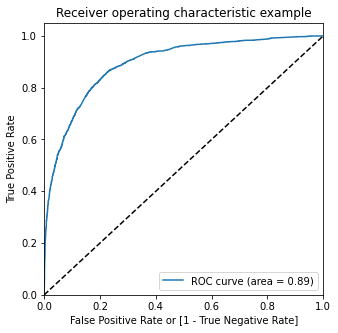

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [113]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.329433,6583,0,1,1,1,1,0,0,0,0,0,0
1,0,0.031413,5948,0,1,0,0,0,0,0,0,0,0,0
2,0,0.034137,1119,0,1,0,0,0,0,0,0,0,0,0
3,0,0.709881,5387,1,1,1,1,1,1,1,1,1,0,0
4,1,0.885869,4424,1,1,1,1,1,1,1,1,1,1,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384271  1.000000  0.000000
0.1   0.1  0.630447  0.969583  0.418795
0.2   0.2  0.749784  0.934285  0.634638
0.3   0.3  0.807792  0.857304  0.776892
0.4   0.4  0.817893  0.788960  0.835950
0.5   0.5  0.814863  0.692452  0.891258
0.6   0.6  0.806926  0.624108  0.921022
0.7   0.7  0.794372  0.544499  0.950316
0.8   0.8  0.768543  0.440856  0.973049
0.9   0.9  0.726118  0.303042  0.990157


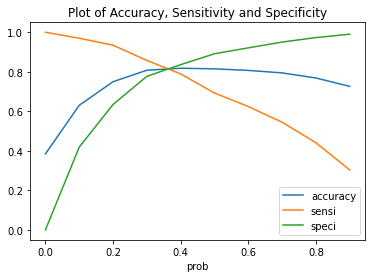

In [162]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Plot of Accuracy, Sensitivity and Specificity')
plt.show()

In [116]:
#based on above plot, the optimum cut-off could be 0.38
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.329433,6583,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.031413,5948,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.034137,1119,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.709881,5387,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.885869,4424,1,1,1,1,1,1,1,1,1,1,0,1


In [117]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.329433,6583,0,33
1,0,0.031413,5948,0,3
2,0,0.034137,1119,0,3
3,0,0.709881,5387,1,71
4,1,0.885869,4424,1,89


In [118]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8171717171717172

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3525,  742],
       [ 525, 2138]])

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
TP / float(TP+FN)

0.8028539241457003

In [122]:
TN / float(TN+FP)

0.8261073353644246

In [123]:
print(FP/ float(TN+FP))

0.17389266463557534


In [124]:
print (TP / float(TP+FP))

0.7423611111111111


In [125]:
print (TN / float(TN+ FN))

0.8703703703703703


In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Precision vs Recall

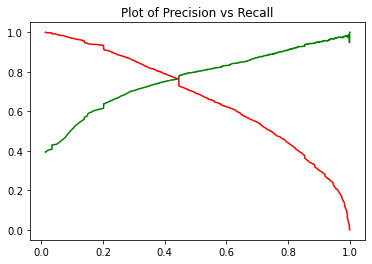

In [165]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Plot of Precision vs Recall')
plt.show()
#Precision vs Recall

In [129]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = sc.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2212,-0.405348,1.135294,-0.119079,-1.025432,-0.303642,-0.080845,1.0,-0.591682,-0.080845,1.435132,...,1.0,-0.055132,1.31794,-0.151754,-0.170156,0.0,-0.559017,-0.046575,-0.072263,1.0
3034,-0.768136,1.406811,-0.682208,-1.025432,3.293350,-0.080845,1.0,-0.591682,-0.080845,-0.696800,...,1.0,-0.055132,1.31794,-0.151754,-0.170156,0.0,-0.559017,-0.046575,-0.072263,1.0
4492,-0.768136,-0.517656,-0.682208,-1.025432,-0.303642,-0.080845,1.0,-0.591682,-0.080845,-0.696800,...,1.0,-0.055132,-0.75876,6.589619,-0.170156,0.0,-0.559017,-0.046575,-0.072263,1.0
5063,0.683014,-0.431431,0.162486,0.975199,-0.303642,-0.080845,1.0,-0.591682,-0.080845,-0.696800,...,1.0,-0.055132,-0.75876,-0.151754,-0.170156,0.0,1.788854,-0.046575,-0.072263,1.0
7645,-1.130924,-0.880901,-1.245338,-1.025432,-0.303642,-0.080845,1.0,-0.591682,-0.080845,-0.696800,...,1.0,-0.055132,1.31794,-0.151754,-0.170156,0.0,-0.559017,-0.046575,-0.072263,1.0


### Apply into Test Data

In [130]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Lead Profile_Other Leads,Lead Profile_Others,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified
2212,1.135294,-1.025432,-0.303642,-0.491191,-0.127585,-0.298511,-0.348367,1.287722,-0.288946,-0.225733,0.583682,-0.171499,-0.672927,1.31794
3034,1.406811,-1.025432,3.293350,-0.491191,-0.127585,-0.298511,-0.348367,1.287722,-0.288946,-0.225733,0.583682,-0.171499,-0.672927,1.31794
4492,-0.517656,-1.025432,-0.303642,2.035870,-0.127585,-0.298511,2.870540,1.287722,-0.288946,-0.225733,0.583682,-0.171499,-0.672927,-0.75876
5063,-0.431431,0.975199,-0.303642,-0.491191,-0.127585,3.349959,-0.348367,-0.776565,-0.288946,-0.225733,0.583682,-0.171499,-0.672927,-0.75876
7645,-0.880901,-1.025432,-0.303642,2.035870,-0.127585,-0.298511,2.870540,1.287722,-0.288946,-0.225733,0.583682,-0.171499,-0.672927,1.31794


In [131]:
X_test_sm = sm.add_constant(X_test)

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
y_test_pred[:10]

2212    0.341429
3034    0.921758
4492    0.208772
5063    0.083298
7645    0.034491
4658    0.498296
7481    0.442835
2608    0.092932
3706    0.163090
5626    0.295603
dtype: float64

In [134]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
y_test_df = pd.DataFrame(y_test)

In [136]:
y_test_df['Prospect ID'] = y_test_df.index

In [137]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2212,0.341429
1,1,3034,0.921758
2,0,4492,0.208772
3,0,5063,0.083298
4,0,7645,0.034491


In [140]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [141]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [142]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2212,0,0.341429,34
1,3034,1,0.921758,92
2,4492,0,0.208772,21
3,5063,0,0.083298,8
4,7645,0,0.034491,3


In [143]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.39 else 0)

In [144]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2212,0,0.341429,34,0
1,3034,1,0.921758,92,1
2,4492,0,0.208772,21,0
3,5063,0,0.083298,8,0
4,7645,0,0.034491,3,0


In [145]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8350649350649351

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1203,  209],
       [ 172,  726]])

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
TP / float(TP+FN)

0.8084632516703786

In [149]:
TN / float(TN+FP)

0.8519830028328612

In [150]:
from sklearn import metrics

In [151]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7764705882352941

In [152]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8084632516703786

### Final Result


#### Train Data: 

1) Accuracy : 81.71%

2) Sensitivity : 80.28%

3) Specificity : 82.61%

#### Test Data:

1) Accuracy : 83.50%

2) Sensitivity : 80.84%

3) Specificity : 85.19%